# Logistic Regression?
Logistic regression is a fundamental concept in machine learning and statistics. It's a type of regression analysis used for predicting the outcome of a categorical dependent variable, based on one or more predictor variables. Logistic regression can be used to create mathematical notations for machine learning. It is used for `classification`.

### Types of Classification?
`Binary Classification`: 
In binary classification, the goal is to classify data points into one of two categories or classes. Examples include:

- Spam vs. Not Spam emails
- Cancerous vs. Non-Cancerous tumors
- Approved vs. Rejected loan applications

`Multi-Class Classification`: 
In multi-class classification, the goal is to classify data points into more than two categories or classes. Examples include:

- Handwritten Digit Recognition (0-9 digits)
- Product Categorization (e.g., electronics, clothing, home goods)
- Sentiment Analysis (positive, negative, neutral)

`Multilabel Classification`: 
In multilabel classification, the goal is to classify data points into multiple categories or classes. For example if we consider a movie, then it can be classified into categories such as action, thriller, mystery, violence, adventure etc.

### Assumptions of Logistic Regression
1. Dependant variable must be categorical in nature
2. There should be no outliers in data
3. There should be no high correaltion among the independant variables. This can be check using a correlation matrix.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [3]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# preprocess the data
# Remove the deck column
df.drop('deck', axis=1, inplace=True)
# Impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
# Impute missing values in embarked and embark town
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Encode the categorical variables using for loop where object and category data types are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13288\2907559720.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13288\2907559720.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [5]:
# X and y column
X = df.drop('survived', axis=1)
y = df['survived']

In [6]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Call the model
model = LogisticRegression()

In [8]:
# Train the model
model.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# predict the values
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Confusion Matrix:  [[105   0]
 [  0  74]]
Accuracy Score:  1.0
F1 Score:  1.0
Recall Score:  1.0
Precision Score:  1.0


Text(0.5, 1.0, 'Confusion Matrix')

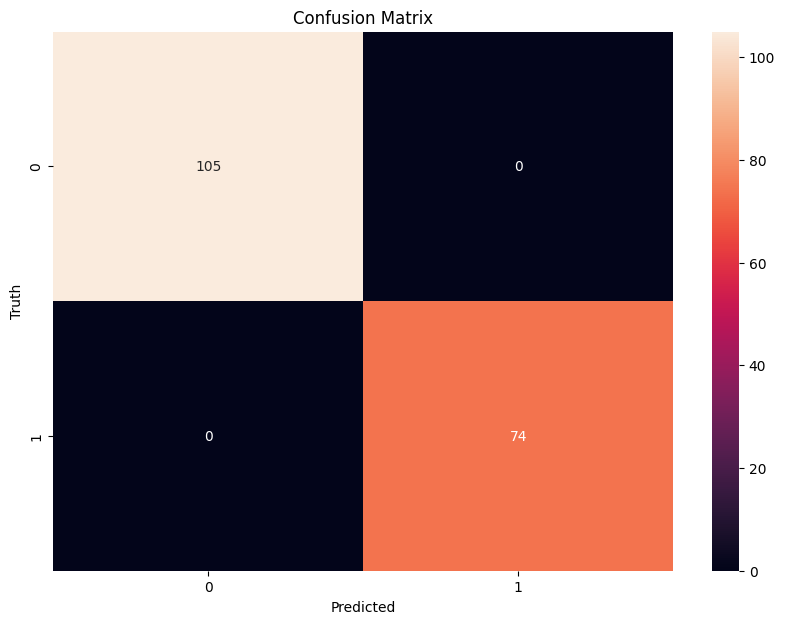

In [13]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [15]:
# Save the model
import pickle
pickle.dump(model, open('model logistic regression.pkl', 'wb'))

---


# Regression vs Classification
##### Difference between Regression and Classification
* Regression is used to predict numeric variables while classification is used to predict categorical variables.
* Metrics for Regression are `MSE`, `RMSE`,` R2`,` MAE`. On the other hand, metrics for Classificstion are `Accuracy score`, `F1 score`, `Recall Score`, `Precision Score`, `Confusion matrix`. 